# Trabalho sobre grafos!

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Caio\AppData\Local\Programs\Python\Python311\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# Tratando arquivos

instruções cedidas pelo proprio autor dos arquivos

In [4]:
#open the csv file using your computer path, and select the usefull columns
df_flights = pd.read_csv('anac.csv', usecols= [0,5,6,7,8,9,10,11,12,13,14,15,16,17])
#dropna exclui linhas vazias
df_flights = df_flights.dropna()

In [5]:
#open the csv file using your computer path, and select the usefull columns
df_airports = pd.read_csv('airports.csv', usecols=[0,1,2,3,4,5])
# exclui linhas vazias
df_airports = df_airports.dropna()

In [6]:
#Códigos cedidos pelo rapaz dos dados

print("teste")

df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('anac.csv')

# Create graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    if row['country'] == 'BRASIL': #Adicionei um if para adicionar apenas nós do Brasil
        G.add_node(row['code'],
                   name=row['name'],
                   region=row['region'],
                   )
# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation',
]].dropna()
df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()
for index, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

# Export to graphml
nx.write_graphml(G, 'air_traffic_new.graphml')



teste


In [7]:
#Percebi que no final estavam vários nós vazios. Realizei a remoção.
nos_remover = [no for no, atributos in G.nodes(data=True) if len(atributos) == 0]
G.remove_nodes_from(nos_remover)
nx.write_graphml(G, 'air_traffic_new.graphml')

# Imprimir os nós restantes
print(G.nodes(data=True))


G = nx.read_graphml('air_traffic_new.graphml')
print("numeros de nós {} numero de vertices {} ".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

[('SBCF', {'name': 'CONFINS', 'region': 'SUDESTE'}), ('SBGL', {'name': 'RIO DE JANEIRO', 'region': 'SUDESTE'}), ('SBGR', {'name': 'GUARULHOS', 'region': 'SUDESTE'}), ('SSUM', {'name': 'UMUARAMA', 'region': 'SUL'}), ('SNBG', {'name': 'BAIXO GUANDU', 'region': 'SUDESTE'}), ('SSBG', {'name': 'BENTO GONÇALVES', 'region': 'SUL'}), ('SBCV', {'name': 'CARAVELAS', 'region': 'NORDESTE'}), ('SBLP', {'name': 'BOM JESUS DA LAPA', 'region': 'NORDESTE'}), ('SBSV', {'name': 'SALVADOR', 'region': 'NORDESTE'}), ('SNGI', {'name': 'GUANAMBI', 'region': 'NORDESTE'}), ('SNTF', {'name': 'TEIXEIRA DE FREITAS', 'region': 'NORDESTE'}), ('SBAR', {'name': 'ARACAJU', 'region': 'NORDESTE'}), ('SBMO', {'name': 'RIO LARGO', 'region': 'NORDESTE'}), ('SBPL', {'name': 'PETROLINA', 'region': 'NORDESTE'}), ('SNBR', {'name': 'BARREIRAS', 'region': 'NORDESTE'}), ('SNVR', {'name': 'VERA CRUZ', 'region': 'NORDESTE'}), ('SBKP', {'name': 'CAMPINAS', 'region': 'SUDESTE'}), ('SBBV', {'name': 'BOA VISTA', 'region': 'NORTE'}), ('S

# Requisito 01 - Assortatividade

In [8]:
#Para estudar depois

nx.attribute_assortativity_coefficient(G,"region")
nx.attribute_mixing_matrix(G, "region")


array([[0.07882781, 0.05599727, 0.01317583, 0.01067697, 0.02078601],
       [0.05599727, 0.17446615, 0.04009541, 0.03441617, 0.02782826],
       [0.01317583, 0.04009541, 0.06905952, 0.01226715, 0.00726942],
       [0.01067697, 0.03441617, 0.01226715, 0.05224898, 0.02226261],
       [0.02078601, 0.02782826, 0.00726942, 0.02226261, 0.13584734]])

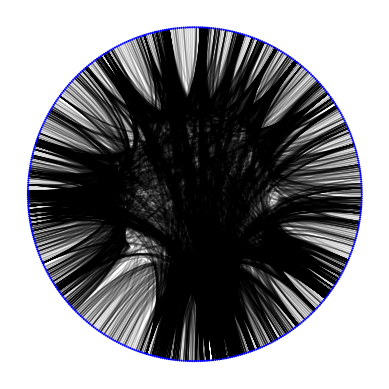

In [9]:
# Plotar o grafo


#função retirada da documentação oficial, porem não sei como preencher.

ax = nv.circos(
    G,
    group_by="region"
)

# Requisito 02


Carry out a bivariate analysis between the vertex degree and the average number of neighbors.
Create a similar graph considering the Brazilian network and all its Regions (North, Northeast, South, Southeast, and Central-West). Report your main findings.

In [10]:
# cálculo da conectividade média de grau (average degree connectivity) de um grafo G
# usando a função average_degree_connectivity da biblioteca networkx.

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convertendo para LISTAS para ficar mais fácil de usar
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)


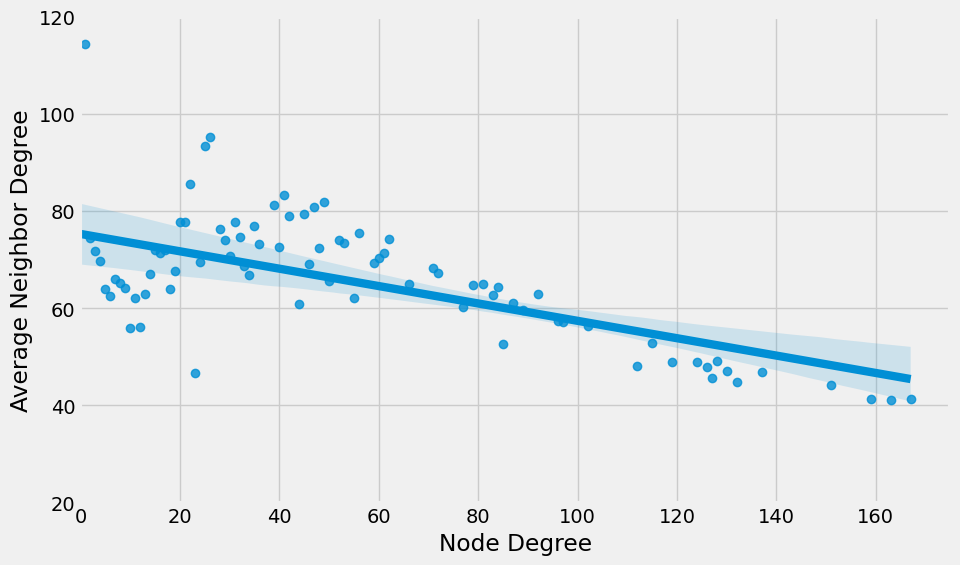

In [16]:
#Plotando o gráfico

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sb.regplot(x=degree, y=avg_neigh_degree, ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average Neighbor Degree")

#Setei os limites para diminuir o espaço em branco no grafico
ax.set_xlim(0,175)
ax.set_ylim(20,120)

plt.show()

# texto BASE para REESCREVER DEPOIS

# ignorar por enquanto


obs: TEXTO A SER REESCRITO E MELHORADO

Essa relação inversa entre o grau dos nós e a média de vizinhos sugere uma possível tendência de segregação ou agrupamento de nós de alto grau com nós de baixo grau. Em termos simples, isso significa que nós altamente conectados tendem a se agrupar entre si, formando grupos densamente conectados, enquanto nós de baixo grau tendem a se agrupar entre si.

Essa tendência é conhecida como "efeito de assortatividade negativa" ou "assortatividade dissortativa". Em redes dissortativas, nós com graus diferentes têm maior probabilidade de se conectarem entre si, criando uma estrutura de rede em que nós de grau alto estão menos propensos a se conectar diretamente com outros nós de grau alto. Isso pode resultar em comunidades distintas dentro do grafo, onde nós de alta conectividade estão conectados principalmente a nós de baixa conectividade.


Quando se observa um efeito de assortatividade negativa em uma rede de aeroportos, significa que aeroportos com diferentes níveis de conectividade tendem a se conectar uns aos outros. Em outras palavras, aeroportos com maior número de rotas (alto grau) têm maior probabilidade de se conectar a aeroportos com menos rotas (baixo grau), formando agrupamentos distintos dentro da rede.

Essa estrutura de rede pode refletir características do sistema de transporte aéreo. Por exemplo, em redes dissortativas de aeroportos, é comum observar hubs aéreos, que são aeroportos com um alto grau de conectividade que atuam como centros de conexão para voos de várias origens e destinos. Esses hubs aéreos tendem a se conectar a aeroportos regionais ou locais com menos rotas diretas, permitindo a transferência de passageiros e a criação de redes de rotas mais amplas.

Os hubs aéreos desempenham um papel importante na conectividade global e regional, facilitando a mobilidade de passageiros e mercadorias entre diferentes cidades e regiões. A presença de hubs aéreos em redes dissortativas pode resultar em benefícios econômicos, pois aumenta a acessibilidade e promove o desenvolvimento de atividades comerciais e turísticas.

Além disso, a estrutura dissortativa da rede de aeroportos também pode influenciar a resiliência do sistema de transporte aéreo. Como hubs aéreos estão conectados a aeroportos de menor grau, em caso de interrupções em determinados aeroportos, a rede ainda pode ter rotas alternativas para garantir a continuidade dos serviços e minimizar os impactos.

Portanto, o efeito de assortatividade negativa em redes de transporte, como aeroportos conectados, pode fornecer insights sobre a estrutura, a eficiência e a resiliência do sistema de transporte aéreo. A análise dessa estrutura pode ajudar na compreensão dos padrões de conectividade e nas estratégias de planejamento e otimização do transporte aéreo.


# Requisito 03

# Connected components

In [23]:
# Obtendo os componentes conectados
componentes_conectados = nx.connected_components(G)

# Contando o número de componentes conectados
num_componentes = len(list(componentes_conectados))
print("Número de componentes conectados:", num_componentes)

# Reiniciando o iterador dos componentes conectados
componentes_conectados = nx.connected_components(G)

# Imprimindo os elementos e a quantidade de nós em cada componente
for i, componente in enumerate(componentes_conectados):
    tamanho_componente = len(componente)
    print("Componente", i+1, ":", componente)
    print("Quantidade de nós:", tamanho_componente)
    print()




Número de componentes conectados: 5
Componente 1 : {'SWCQ', 'SNTS', 'SBUL', 'SWRF', 'SNBR', 'SBJD', 'SNPX', 'SSNH', 'SWJI', 'SNVB', 'SBMC', 'SBAN', 'SWZM', 'SWKO', 'SBNM', 'SBME', 'SDDM', 'SSBN', 'SNXB', 'SWNO', 'SNNU', 'SNAX', 'SBAU', 'SIKC', 'SNDV', 'SWLB', 'SWLF', 'SBTF', 'SBCN', 'SJHG', 'SBBI', '2NHT', 'SNXW', 'SNYB', 'SBCM', 'SBHT', 'SSSK', 'SNAR', 'SBPO', 'SWIQ', 'SDLU', 'SNTI', 'SWPC', 'SWBE', 'SBJV', 'SBBR', 'SBCC', 'SNJB', 'SJQK', 'SNIG', 'SBMH', 'SDLK', 'SNYA', 'SJLU', 'SNGV', 'SBPJ', 'SBPG', 'SNML', 'SBUF', 'SWWU', 'SJGU', 'SWSI', 'SBAQ', 'SIGP', 'SBSO', 'SNGQ', 'SBNT', 'SWRP', 'SBEK', 'SBCY', 'SBAV', 'SSHZ', 'SNUI', 'SWWA', 'SBGV', 'SDFR', 'SWUI', 'SDAG', 'SNUO', 'SBCV', 'SBSG', 'SBJI', 'SBTU', 'SSCK', 'SWBR', 'SNDT', 'SWGI', 'SBMD', 'SBBH', 'SILC', 'SBJC', 'SSJA', 'SJNP', 'SNGA', 'SBLO', 'SBLE', 'SNGX', 'SWBZ', 'SBMK', 'SNZR', 'SNBI', 'SBSM', 'SWFX', 'SNXL', 'SIRI', 'SBFZ', 'SWPY', 'SWCP', 'SNMJ', 'SBAR', 'SIBU', 'SBDN', 'SNRB', 'SNVC', 'SNEB', 'SWLC', 'SBUG', 'SBQV', 'SNB

99% do grafo faz parte do mesmo elemento conectado, com exceção de 4 "ilhas". Essas ilhas, desduz-se, podem ser aeroportos privados, militares ou ainda aeroportos que realizam voos exclusivamente internacionais.

# Requisito 04

Create a simulated scenario where a trip with
the following route is desired:

● City 1 (North) to City 2 (South)

● City 2 (South) to City 3 (Northeast)

● City 3 (Northeast) to City 4 (Central-West)

● City 4 (Central-West) to City 5 (Southeast)

Para realização do experimento 04, escolhi uma viagem entre 5 capitais.


Belém (Norte) - > 'SBBE'

Porto Alegre (Sul) - > 'SBPA'

João Pessoa (Nordeste) -> 'SNJO'

Brasilia (Centro-Oeste) -> 'SBBR'

Belo Horizonte (Sudeste) -> 'SBBH'

In [52]:
#Verificando o menor caminho para a rota 01, Belém -- Porto Alegre:
print(nx.shortest_path(G, 'SBBE', 'SBPA'))
print(nx.shortest_path_length(G, 'SBBE', 'SBPA'))


#Verificando o menor caminho para a rota 02, Porto Alegre -- João Pessoa:
print(nx.shortest_path(G, 'SBPA', 'SNJO'))
print(nx.shortest_path_length(G, 'SBPA', 'SNJO'))



#Verificando o menor caminho para a rota 03, João Pessoa -- Brasilia:
print(nx.shortest_path(G, 'SNJO', 'SBBR'))
print(nx.shortest_path_length(G, 'SNJO', 'SBBR'))


#Verificando o menor caminho para a rota 04, Brasilia -- Belo Horizonte:
print(nx.shortest_path(G, 'SBBR', 'SBBH'))
print(nx.shortest_path_length(G, 'SBBR', 'SBBH'))

  

['SBBE', 'SBPA']
1
['SBPA', 'SBRF', 'SNJO']
2
['SNJO', 'SBRF', 'SBBR']
2
['SBBR', 'SBBH']
1


Resultados:
    
    Para a rota 01, Belem-PA a Porto Alegre-RS, não é necessário escala, podendo-se chegar ao destino com um unico voô. 
    
    para a rota 02, no entando, a saber, Porto Alegre-RS a João Pessoa-PB, é necessário antes fazer escala em João Pessoa.
    
    Curiosamente, o mesmo acontece para a rota 03, para voar de João Pessoa com destino a Brasilia, o menor caminho é passar
    por Recife.
    
    Já a ultima rota, Brasilia a Belo Horizonte, é rota unica. 
    
    Com base nessas informações, foi feito o estudo de precificação, comparando o preço das passagens por companhia aerea. 
    Para verificação dos preços, usou-se o site: 123milhas.com
    
    Verificou-se que o valor gasto para se fazer essa rota pode variar entre R$2945,00 a R$5000,00
   

# Requisito 05

Conduct a study on the Clustering Coefficient
considering the National Air Network, as well as
the individual air sub-networks of each Region
(North, Northeast, Central-West, South, and
Southeast).